# SUPERMARKET VISUALIZATION

This project was carried out to demonsttrated the analyst's python capacity is cattying out exploratory data analysis. Owing to the inchoate nature of this dataset, with it indicating the company made no profits from any of its products(all leading to zero), it was not possible to draw any realistic insights from its values. Thus, it simply serves as an exhibition purpose.

Firstly, python libraries for analysis were imported

In [2]:
import pandas as pd # pandas for data manipulation
import numpy as np # numoy for performing mathematical operations on arrays

import seaborn as sns #seaborn for visualization
#sns.set_style('whitegrid')=False
import matplotlib.pyplot as plt # matplotlib for visualization


import missingno as msno # to visualize missing sets


Importing the dataframe

In [3]:
df = pd.read_csv('datasets\supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape
# Dataset has 1000 rows and 17 columns

(1000, 17)

# DATA PREPARATION AND CLEANING

In [5]:
columns = list(df.columns)
columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [6]:
df.dtypes
# to learn what data type each column contains

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Renaming columns

In [7]:
# python's rename function enables renaming columns for ease pf data manipulation
# columns with spaces between names, unnecessary symbols and errors can be difficult to interact with and are likelier to draw up errors
# underscore symbol was added to each column with more than one name

df.rename(columns={
'Invoice ID': 'Invoice_ID' ,
 'Customer type':'Customer_type',
 'Product line':'Product_line',
'gross margin percentage':'gross_margin_percentage',
'gross income':'gross_income',
'Tax 5%':'Tax_5%',
'Unit price': 'Unit_price'},inplace= True)



Checking for missing values


In [8]:
df.info() 
# this function gives information aout each column, among which is the number of empty values present per column
#Dataframe has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice_ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer_type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product_line             1000 non-null   object 
 6   Unit_price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax_5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

Checking for duplicated values

In [9]:
df.duplicated().value_counts()

duplicates = df.duplicated(subset= ['Invoice_ID','Branch','City','Customer_type','Gender'], keep = False)
df[duplicates]

#dataframe has no duplicate values

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating


In [10]:
#df[['Branch','City','Customer_type','Gender','Product_line']].unique()
a =df[['Branch','Product_line','City','Customer_type','Gender']].nunique()
a


Branch           3
Product_line     6
City             3
Customer_type    2
Gender           2
dtype: int64

As the dataframe appears to have no missing,duplicate or unexpected values, we can move onto the next step

# CREATING USER FUNCTIONS

In [11]:

def countplot(data ,x ,h ,xlabel, title, figsize=(15, 5)):
    """"""
    plt.figure(figsize=figsize)
    sns.countplot(data=data,x=x,hue=h)
    sns.color_palette('rocket')
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
    
    
def histplot(data, x,xlabel, title, figsize=(10,5)):
    plt.figure(figsize=figsize)
    plt.hist(data=data,x=x)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    
    
    
    
def barplot(data, x, y, xlabel, ylabel, title,ticks,labels, ci = False, figsize=(20,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y=y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ticks = ticks, labels= labels)  # Set x-axis labels
    plt.show()
    

 CREATING VARIABLES TO HOLD ALL DATA FOR EACH BRANCH

In [12]:
Branch_A = df[df['Branch']== 'A']
Branch_B = df[df['Branch']== 'B']
Branch_C = df[df['Branch']== 'C']

# EXPLORATORY DATA ANALYSIS

 Now we visualize relationships to unearth patterns or unique trends using various metrics

VISUALIZING THE SPREAD OF CUSTOMER TYPES IN EACH BRANCH

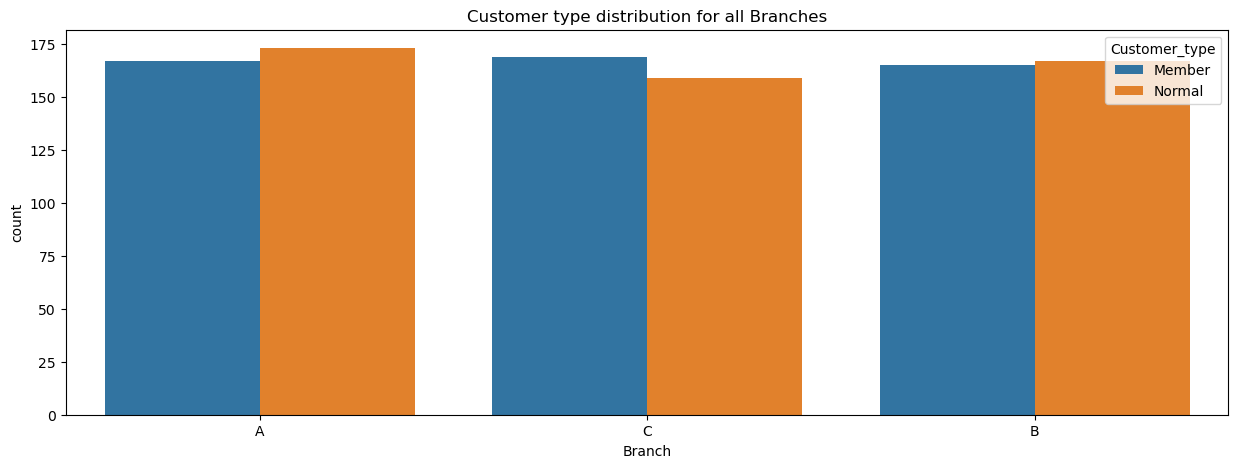

In [13]:
countplot(df,x = df.Branch, h = df.Customer_type, xlabel = 'Branch', title = 'Customer type distribution for all Branches')

GROSS INCOME BASED ON CUSTOMER TYPE 

<Axes: title={'center': 'Member vs Normal Customer gross income '}, xlabel='Customer_type'>

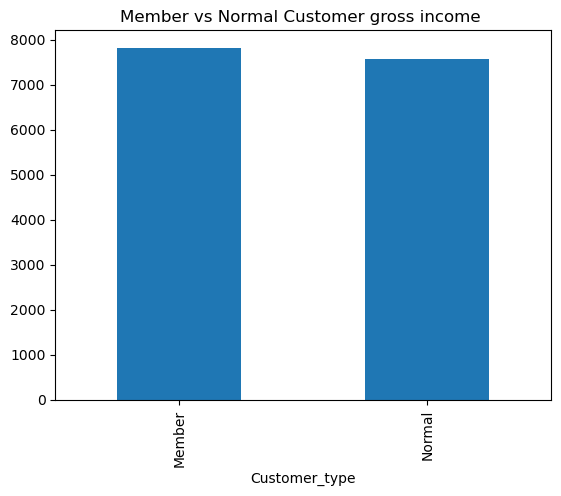

In [14]:
#   FIRST WE CREATE A VARIABLE TO COMBINE CUSTOMER TYPE AND GROSS INCOME VALUES

Customer_gross_income = df.groupby('Customer_type')['gross_income'].sum()

# NEXT WE VISUALIZE WITH THR BARPLOT FUNCTION

Customer_gross_income.plot(kind = 'bar', x = Customer_gross_income.index, y = Customer_gross_income.values, 
                           title = 'Member vs Normal Customer gross income ' )


GROSS MARGINS BASED ON CUSTOMER TYPE

<Axes: title={'center': 'Member vs Normal Customer gross margin percentage'}, xlabel='Customer_type'>

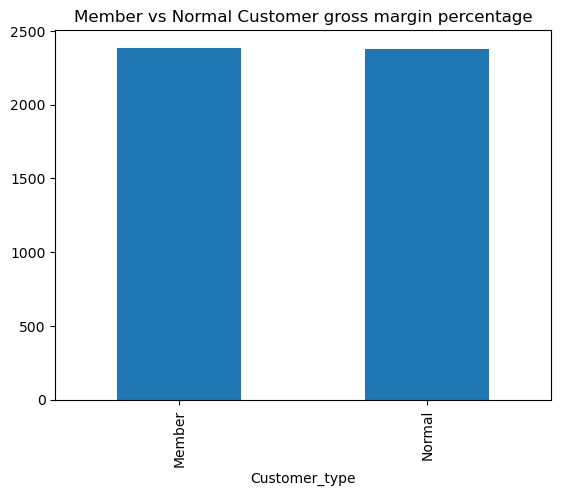

In [15]:
#   FIRST WE CREATE A VARIABLE TO COMBINE CUSTOMER TYPE AND GROSS INCOME VALUES

Customer_gross_margin_percentage = df.groupby('Customer_type')['gross_margin_percentage'].sum()
Customer_gross_margin_percentage

# NEXT, WE VISUALIZE USING THE A BARPLOT

Customer_gross_margin_percentage.plot(kind = 'bar', x = Customer_gross_margin_percentage.index, y = Customer_gross_margin_percentage.values,
                                     title = 'Member vs Normal Customer gross margin percentage')


PRODUCT LINE GROSS INCOME PER BRANCH

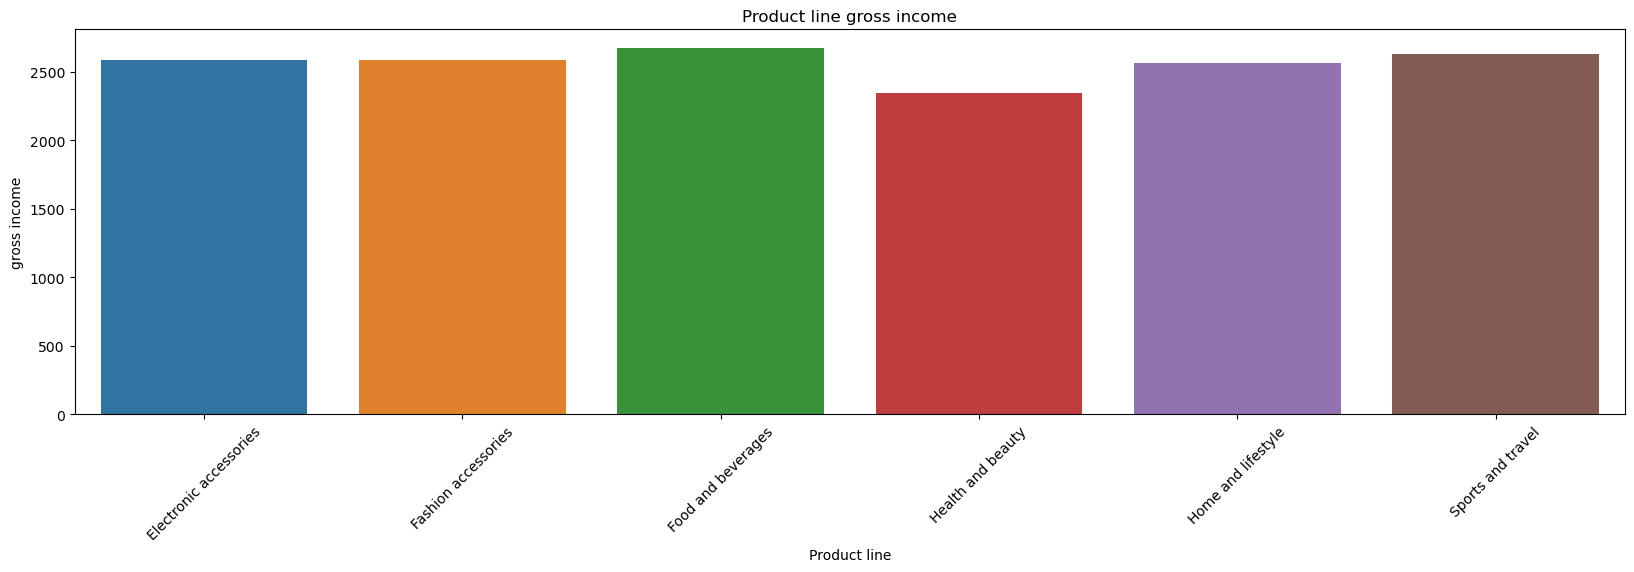

In [16]:
# FIRST VISUALIZING PRODUCT LINE INCOME ACROSS ALL BRANCHES

product_line_gross_income = df.groupby('Product_line')['gross_income'].sum()
product_line_gross_income

barplot(product_line_gross_income,product_line_gross_income.index,
        product_line_gross_income.values,'Product line','gross income',
        'Product line gross income',range(len(product_line_gross_income)),product_line_gross_income.index)




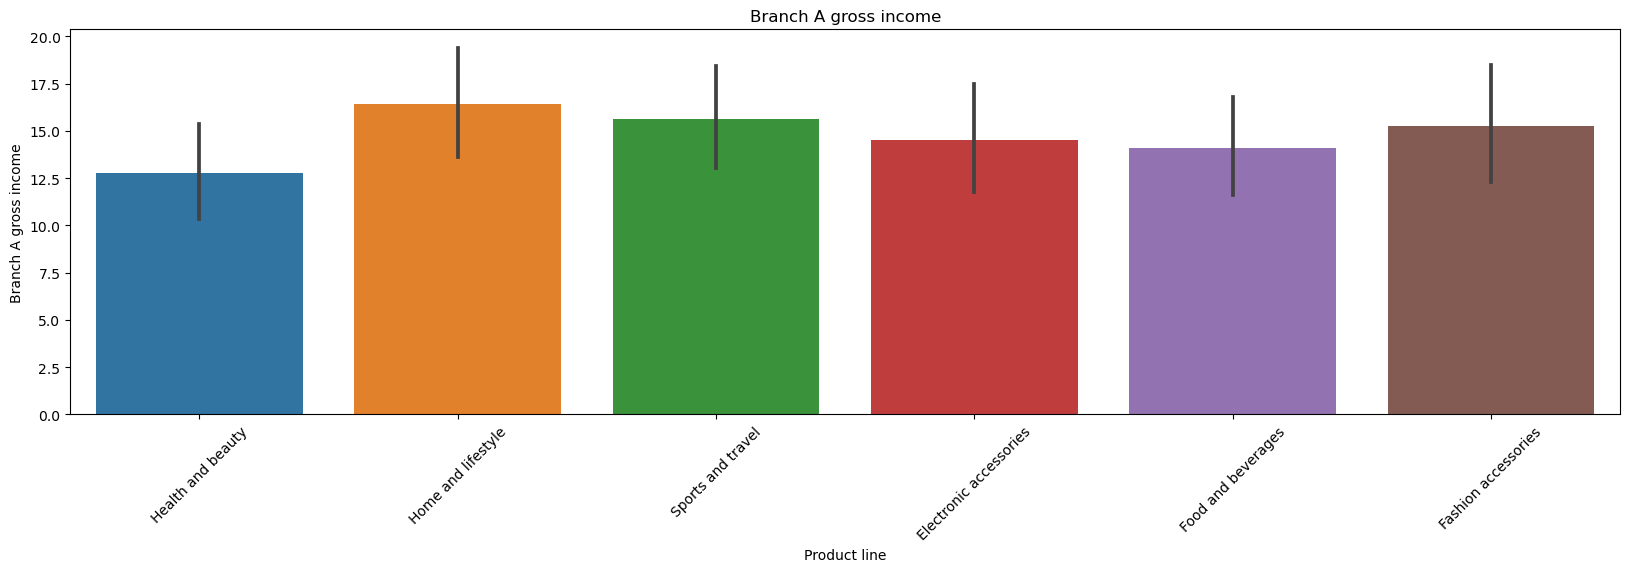

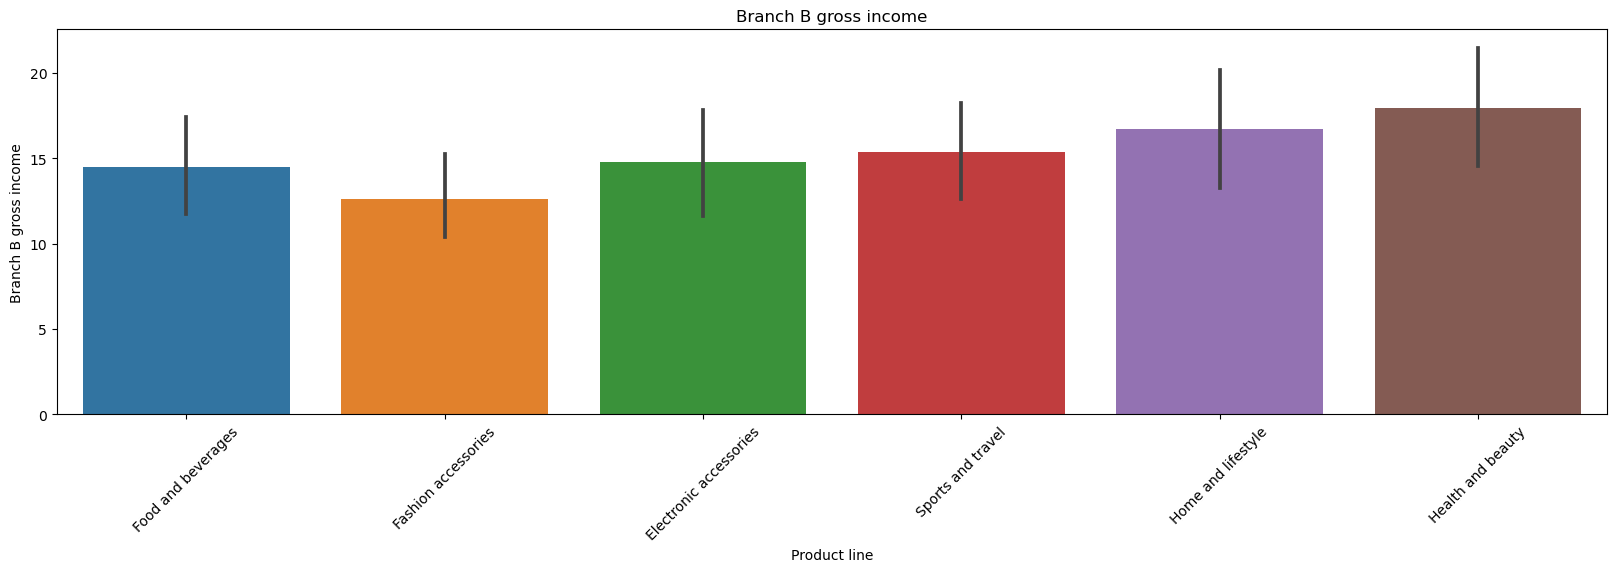

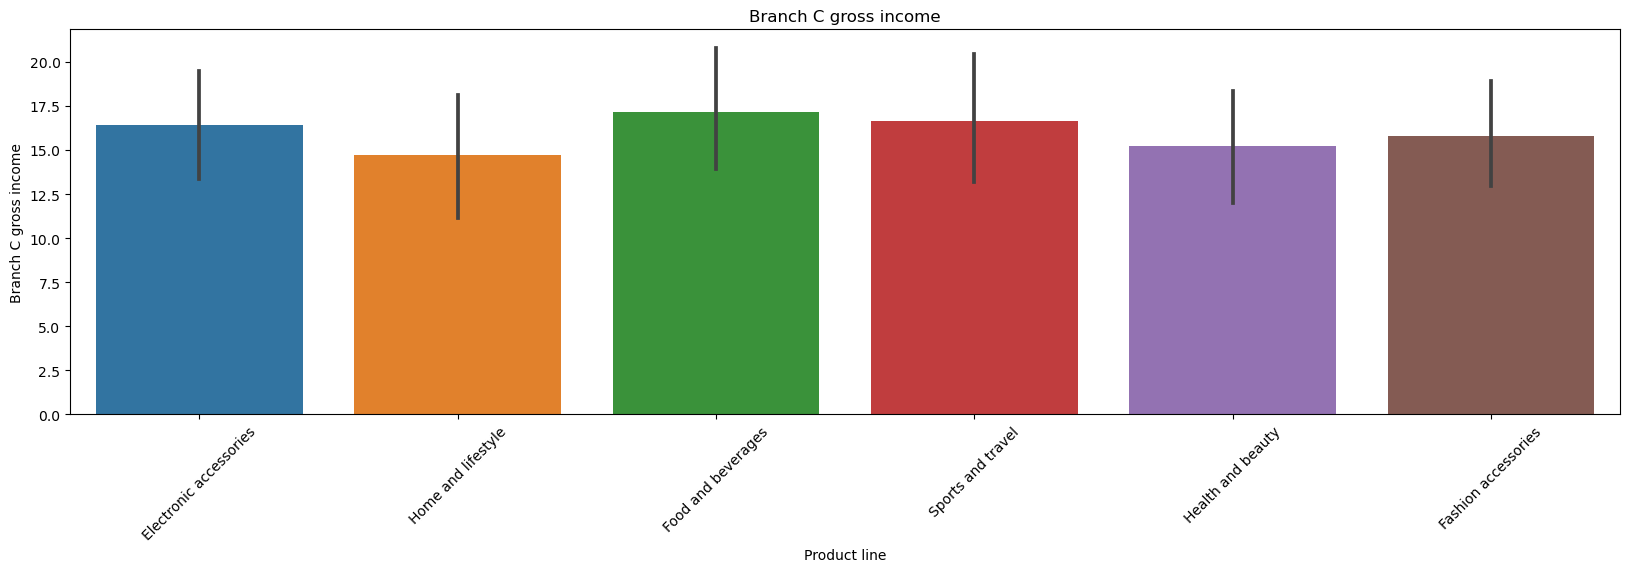

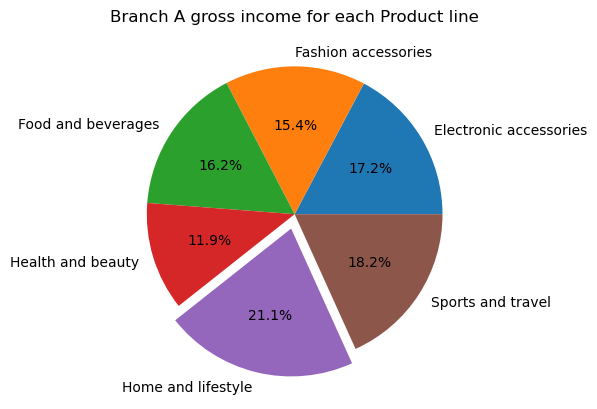

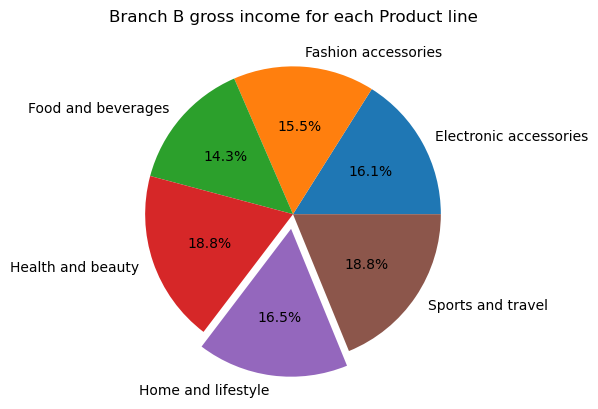

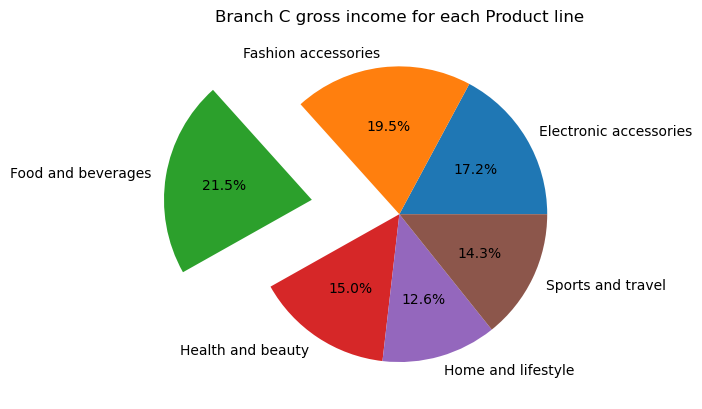

In [17]:
# NEXT  WE VISUALIZE EACH PRODUCT LINE'S GROSS INCOME PER BRANCH USING BARPLOTS AND PIE CHARTS
# For Branch A

barplot(Branch_A, Branch_A['Product_line'],Branch_A.gross_income, 'Product line', 'Branch A gross income', title = 'Branch A gross income', ticks = None,labels = None)


#FOR BRANCH B

barplot(Branch_B, Branch_B['Product_line'],Branch_B.gross_income, 'Product line', 'Branch B gross income', title = 'Branch B gross income', ticks = None,labels = None)


# FOR BRANCH C

barplot(Branch_C, Branch_C['Product_line'],Branch_C.gross_income, 'Product line', 'Branch C gross income', title = 'Branch C gross income', ticks = None,labels = None)



#CREATING VARIABLES TO HOLD PRODUCT LINE AND GROSS INCOME FOR EACH BRANCH

Branch_A_product_line_gross_income = Branch_A.groupby('Product_line')['gross_income'].sum()
Branch_B_product_line_gross_income = Branch_B.groupby('Product_line')['gross_income'].sum()
Branch_C_product_line_gross_income = Branch_C.groupby('Product_line')['gross_income'].sum()



#PIE CHARTS TO ASSIGN PERCENTAGES

my_explode_A = [0,0,0,0,0.1,0]
plt.pie(Branch_A_product_line_gross_income, labels = Branch_A_product_line_gross_income.index,  autopct='%1.1f%%', explode = my_explode_A)
plt.title('Branch A gross income for each Product line')
plt.show()


my_explode_B = [0,0,0,0,0.1,0]
plt.pie(Branch_B_product_line_gross_income, labels = Branch_B_product_line_gross_income.index,  autopct='%1.1f%%', explode = my_explode_B)
plt.title('Branch B gross income for each Product line')
plt.show()


my_explode_C = [0,0,0.6,0,0,0]
plt.pie(Branch_C_product_line_gross_income, labels = Branch_C_product_line_gross_income.index,  autopct='%1.1f%%', explode = my_explode_C)
plt.title('Branch C gross income for each Product line')
plt.show()


PRODUCT LINE GROSS MARGIN PERCENTAGES PER BRANCH

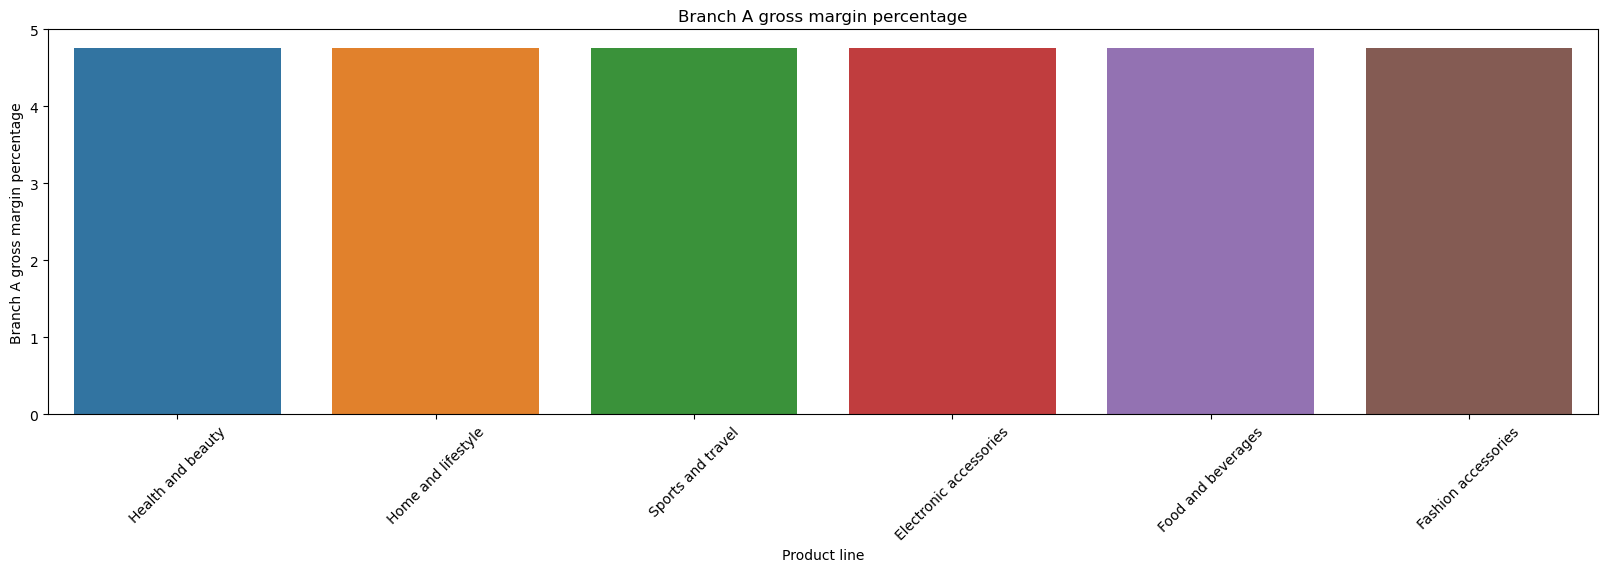

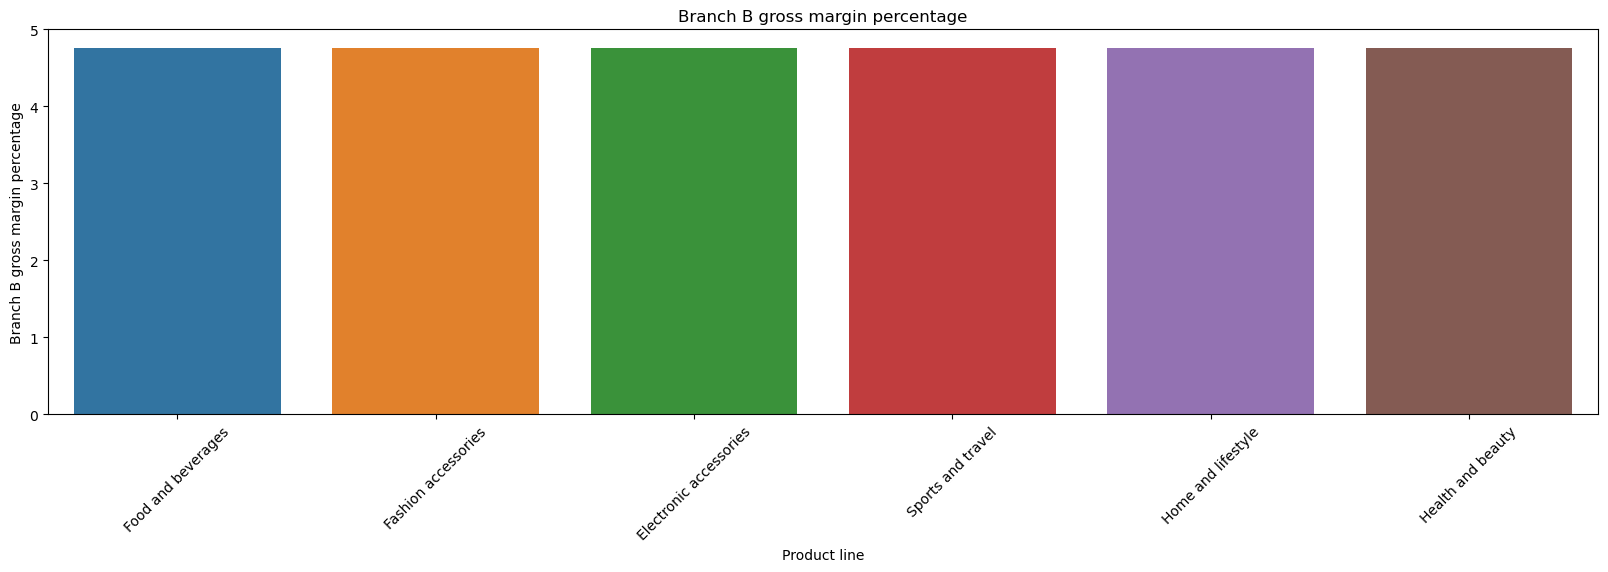

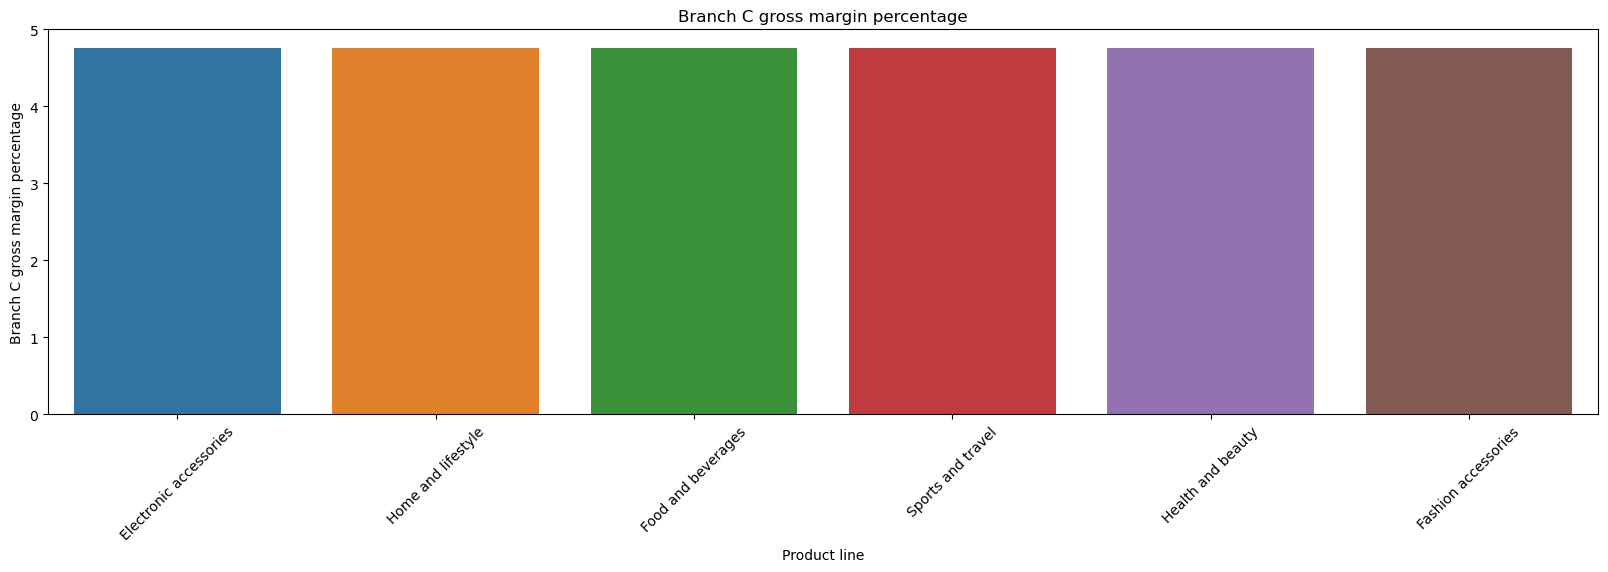

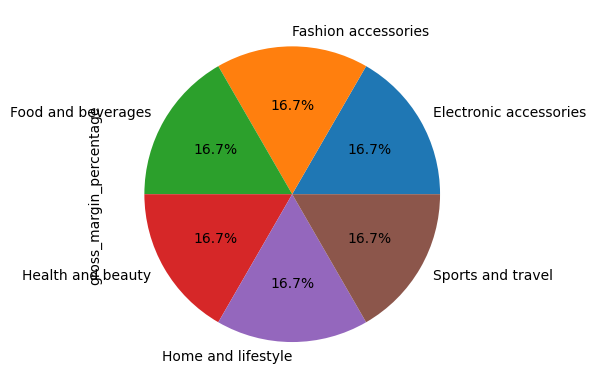

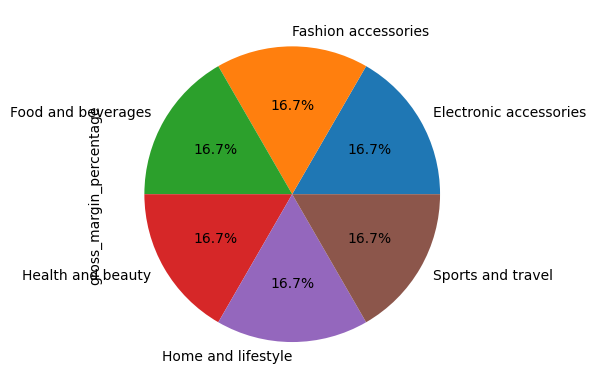

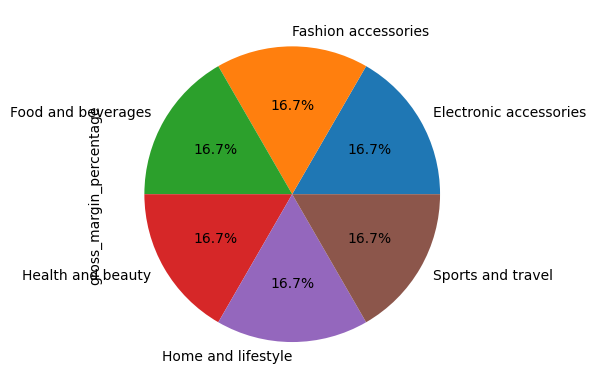

In [18]:
# FIRST WE VISUALIZE USING BARPLOTS

# FOR BRANCH A
barplot(Branch_A, Branch_A['Product_line'],Branch_A.gross_margin_percentage, 'Product line', 'Branch A gross margin percentage', title = 'Branch A gross margin percentage', ticks = None,labels = None)

# FOR BRANCH B
barplot(Branch_B, Branch_B['Product_line'],Branch_B.gross_margin_percentage, 'Product line', 'Branch B gross margin percentage', title = 'Branch B gross margin percentage', ticks = None,labels = None)

# FOR BRANCH C
barplot(Branch_C, Branch_C['Product_line'],Branch_C.gross_margin_percentage, 'Product line', 'Branch C gross margin percentage', title = 'Branch C gross margin percentage', ticks = None,labels = None)

#  NEXT WE CREATE VARIABLES TO HOLD PRODUCT LINE AND GROSS MARGINS

branch_product_line_gross_margins_A = Branch_A.groupby('Product_line')['gross_margin_percentage'].mean()
branch_product_line_gross_margins_B = Branch_B.groupby('Product_line')['gross_margin_percentage'].mean()
branch_product_line_gross_margins_C = Branch_C.groupby('Product_line')['gross_margin_percentage'].mean()


# AS GROSS MARGINS ARE REPRESENTED IN PERCENTAGES, THEY CAN NOT BE SUMMED UP
# PLOTTING GROSS MARGIN PERCENTAGES PER BRANCH :


Branch_A.groupby('Product_line')['gross_margin_percentage'].mean().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

Branch_B.groupby('Product_line')['gross_margin_percentage'].mean().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()

Branch_C.groupby('Product_line')['gross_margin_percentage'].mean().plot(kind = 'pie', autopct='%1.1f%%')
plt.show()


In [19]:
Branch_A.gross_margin_percentage.mean()

4.761904762

VISUALIZING GROSS INCOME PER BRANCH


<Axes: title={'center': 'Gross income per Branch'}, ylabel='Branch'>

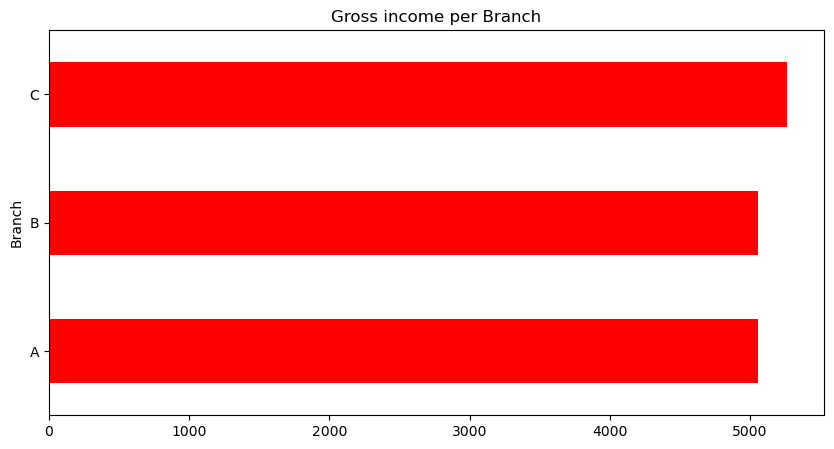

In [20]:
branch_gross_income_sum = df.groupby('Branch')['gross_income'].sum()
branch_gross_income_sum.index



branch_gross_income_sum.plot(kind= 'barh', x = branch_gross_income_sum.index, y= branch_gross_income_sum.values, 
title = 'Gross income per Branch',color = 'red',
 figsize = (10,5))

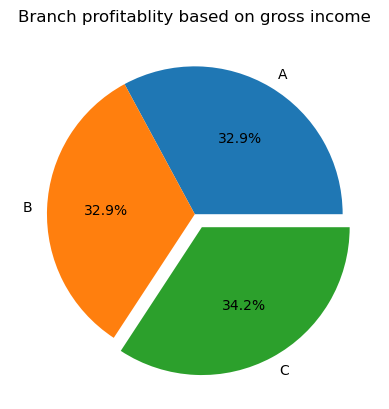

In [21]:
my_explode = [0,0,0.1]
plt.pie(branch_gross_income_sum, labels = branch_gross_income_sum.index, autopct='%1.1f%%', explode = my_explode)
plt.title('Branch profitablity based on gross income')
plt.show()

VISUALIZING GROSS MARGIN PERCENTAGE

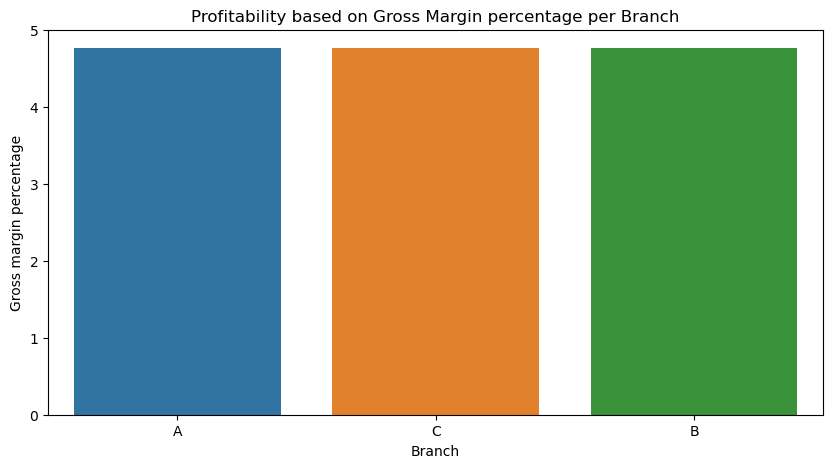

Text(0.5, 1.0, 'Profitability based on Gross Margin percentage per Branch')

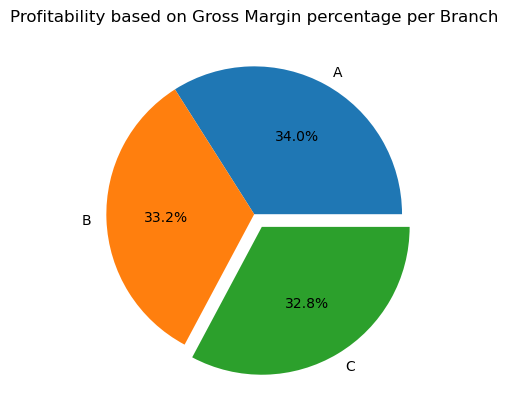

In [22]:
#Gross margin percentages per Branch

plt.figure(figsize=(10, 5))
sns.barplot(data =df,x=df.Branch, y=df.gross_margin_percentage)
plt.title('Profitability based on Gross Margin percentage per Branch')
plt.xlabel('Branch')
plt.ylabel('Gross margin percentage')
plt.show()



plt.pie(df.groupby('Branch')['gross_margin_percentage'].sum(),labels = df.groupby('Branch')['gross_margin_percentage'].sum().index, autopct='%1.1f%%', explode = my_explode)
plt.title('Profitability based on Gross Margin percentage per Branch')

#Branch_gross_margin_percentage= df.groupby('Branch')['gross_margin_percentage'].sum()
#plt.pie(Branch_gross_margin_percentage,labels = Branch_gross_margin_percentage.index, autopct='%1.1f%%', explode = my_explode)

PRODUCT LINE PER CUSTOMER TYPE

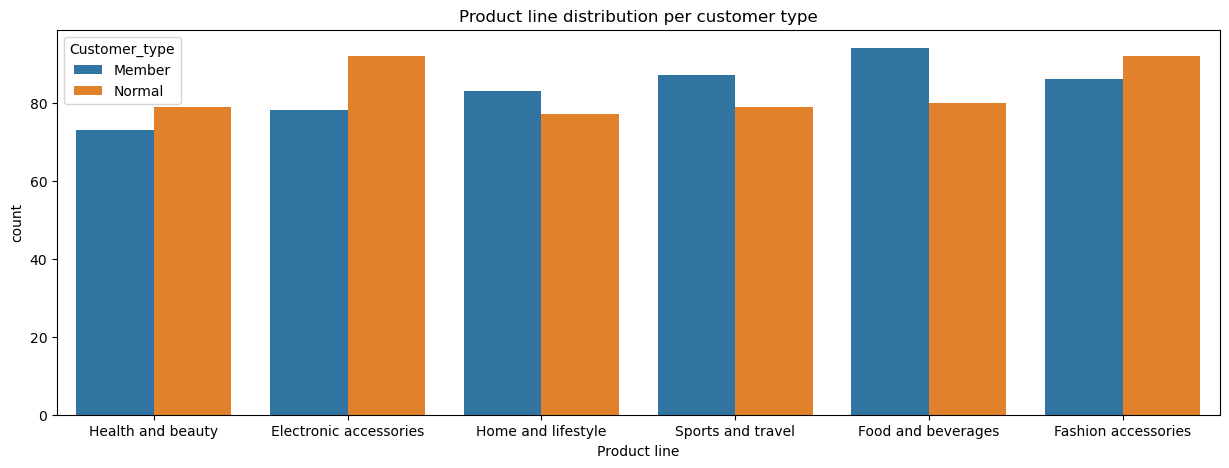

In [23]:
countplot( df,df['Product_line'],df['Customer_type'], 'Product line', 'Product line distribution per customer type')

PRODUCT LINE VISUALIZATION BY RATING 

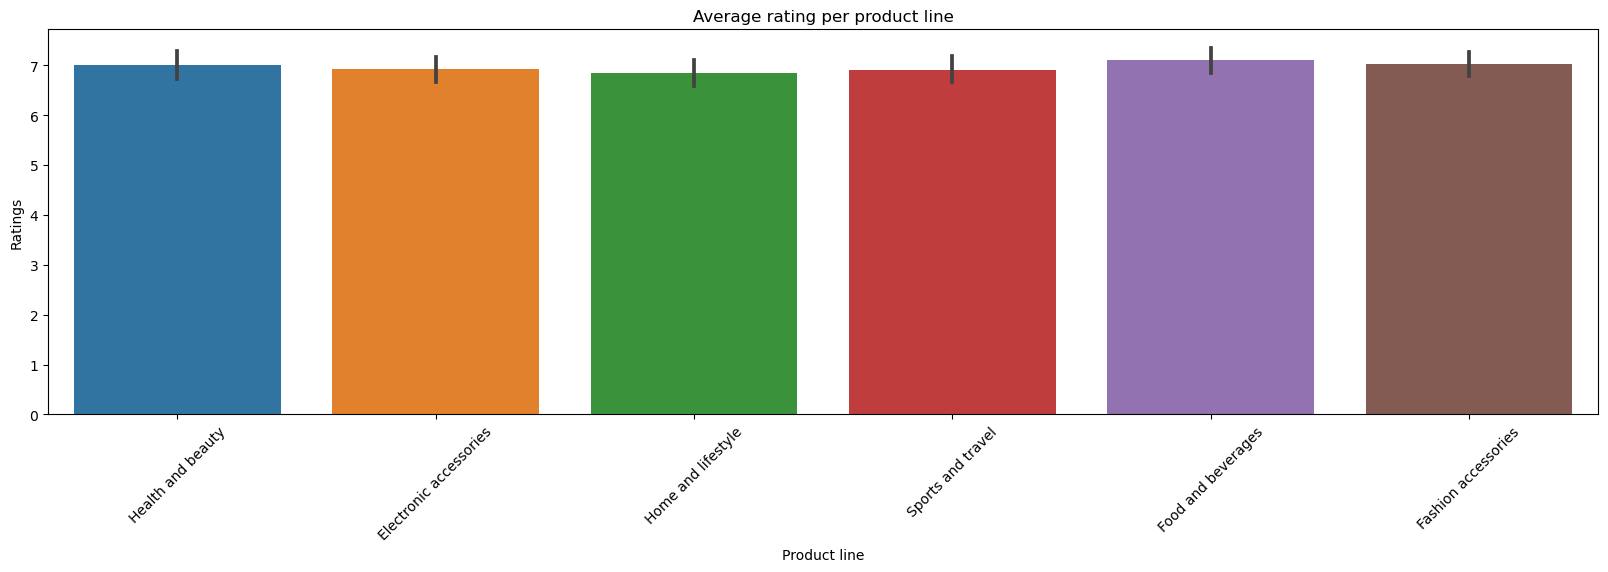

In [24]:
barplot(df,df['Product_line'],df['Rating'],'Product line','Ratings','Average rating per product line',ticks=None, labels=None)

In [25]:
df.head()

,Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [26]:
df.Rating.min()

4.0

In [27]:
#creating a binary dataframe where Rating >= 5.0 is good and <5.0 is bad
#df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 0, 'Attrited Customer': 1})

#ood =df[df['Rating'] >= 5]
#bad = df[df['Rating'] < 5]
#df1 = df['Rating'] = df['Rating'].replace({'Rating' :})





def juliet():
    if df['Rating'] >= 5:
        return 'good'
    else: 
        return 'bad' 
    

df['Rating'] = df['Rating'].apply(juliet())


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Using binary versions to turn rating figures into good or bad... 1 for good, 0 for bad

In [ ]:
good_rating = df['Rating'].apply(lambda x : 1 if x >= 5 else 0)
df['good_rating']= good_rating

In [ ]:
df.head(10)

In [ ]:
corr = df.corr
a = df[['Gender','Branch']]
a

ABSOLUUTE CORRELATION VALUES: using coefficents to tell whether features are correlated or not, as opposed to being positively or negatively correlated

In [ ]:
corr = a.corr
abs(corr['Branch']).sort_values(ascending = False)

In [ ]:
columns

In [ ]:
city = ['Yangon','Naypyitaw']
city

In [ ]:
is_city = df.City.isin(city)
is_city

In [ ]:
df['city_place'] = 0
df.loc[is_city, 'city_place'] = 1

In [ ]:
df.loc[is_city]

# ASSIGNING CATEGORICAL CODES TO CATEGORICAL VARAIBLES

In [ ]:
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df.dtypes

Invoice ID                   object
Branch                       object
City                       category
Customer type                object
Gender                     category
Product line                 object
Unit price                  float64
Quantity                      int64
Tax 5%                      float64
Total                       float64
Date                         object
Time                         object
Payment                      object
cogs                        float64
gross margin percentage     float64
gross income                float64
Rating                      float64
dtype: object

In [ ]:
# '.cat.codes assigns numbers to each variable
df['Gen_new'] = df['Gender'].cat.codes
df['City_new'] = df['City'].cat.codes
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Gen_new,City_new
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0,2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,1,2
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,1,2
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,1,1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8,0,2
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,0,1
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,0,2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9,0,0


In [ ]:
df['Customer type'] = df['Customer type'].astype('category')
df['Customer_type_new'] = df['Customer type'].cat.codes
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Gen_new,City_new,Customer_type_new
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0,2,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0,1,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,1,2,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,2,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,1,2,1


In [ ]:
b = "Hello, World!"
print(b[2:])

llo, World!


In [ ]:
b[-5:-2]


'orl'